In [1]:
#Importing the libraries:
import numpy as np #linear algebra
import pandas as pd #read the dataset and to preprocess it
import matplotlib.pyplot as plt #plotting and graphing data
import seaborn as sns

In [2]:
#Read the dataset:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df
#binary features: hypertension, heart_disease, diabetes
#smoking_history: categorical

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [5]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [8]:
df.gender.value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [9]:
df.duplicated().sum()

3854

In [10]:
df = df.drop_duplicates()

In [11]:
df.shape

(96146, 9)

In [12]:
df = df[df['gender']!= 'Other']
df.dropna()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


<AxesSubplot:>

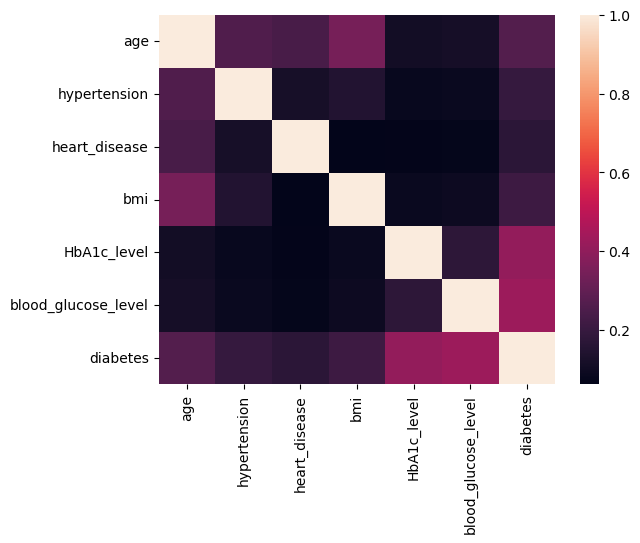

In [13]:
sns.heatmap(df.corr())

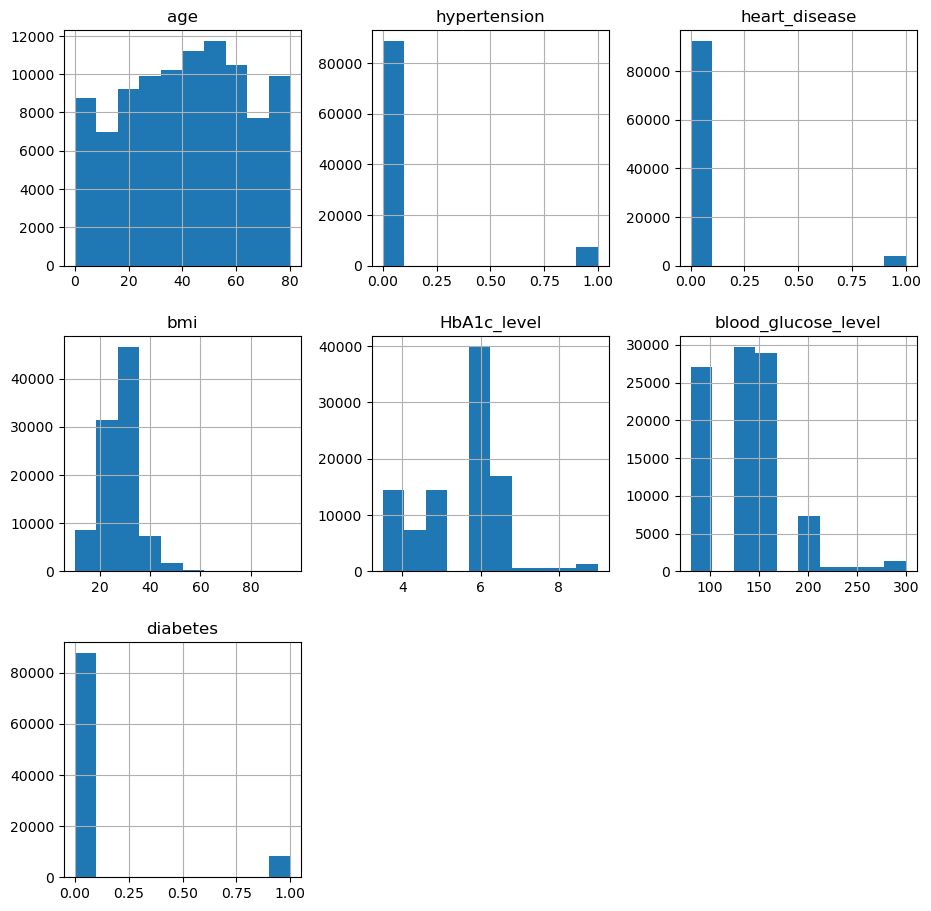

In [14]:
df.hist(figsize = (11, 11))
plt.show()

In [15]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values\n")

gender: 2 distinct values

age: 102 distinct values

hypertension: 2 distinct values

heart_disease: 2 distinct values

smoking_history: 6 distinct values

bmi: 4247 distinct values

HbA1c_level: 18 distinct values

blood_glucose_level: 18 distinct values

diabetes: 2 distinct values



In [16]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [17]:
for i in dir(plt):
    print(i)

Annotation
Arrow
Artist
AutoLocator
Axes
Button
Circle
Figure
FigureCanvasBase
FixedFormatter
FixedLocator
FormatStrFormatter
Formatter
FuncFormatter
GridSpec
IndexLocator
Line2D
LinearLocator
Locator
LogFormatter
LogFormatterExponent
LogFormatterMathtext
LogLocator
MaxNLocator
MouseButton
MultipleLocator
Normalize
NullFormatter
NullLocator
Number
PolarAxes
Polygon
Rectangle
ScalarFormatter
Slider
Subplot
SubplotSpec
Text
TickHelper
Widget
_INSTALL_FIG_OBSERVER
_IP_REGISTERED
_IoffContext
_IonContext
__builtins__
__cached__
__doc__
__file__
__loader__
__name__
__package__
__spec__
_api
_auto_draw_if_interactive
_backend_mod
_copy_docstring_and_deprecators
_get_backend_mod
_get_required_interactive_framework
_interactive_bk
_log
_pylab_helpers
_setup_pyplot_info_docstrings
_warn_if_gui_out_of_main_thread
_xkcd
acorr
angle_spectrum
annotate
arrow
autoscale
autumn
axes
axhline
axhspan
axis
axline
axvline
axvspan
bar
bar_label
barbs
barh
bone
box
boxplot
broken_barh
cbook
cla
clabel
clf
cl

In [18]:
for i in dir(sns):
    print(i)

FacetGrid
JointGrid
PairGrid
__builtins__
__cached__
__doc__
__file__
__loader__
__name__
__package__
__path__
__spec__
__version__
_core
_decorators
_docstrings
_orig_rc_params
_statistics
algorithms
axes_style
axisgrid
barplot
blend_palette
boxenplot
boxplot
categorical
catplot
choose_colorbrewer_palette
choose_cubehelix_palette
choose_dark_palette
choose_diverging_palette
choose_light_palette
clustermap
cm
color_palette
colors
countplot
crayon_palette
crayons
cubehelix_palette
dark_palette
desaturate
despine
displot
distplot
distributions
diverging_palette
dogplot
ecdfplot
external
factorplot
get_data_home
get_dataset_names
heatmap
histplot
hls_palette
husl_palette
jointplot
kdeplot
light_palette
lineplot
lmplot
load_dataset
matrix
miscplot
move_legend
mpl
mpl_palette
pairplot
palettes
palplot
plotting_context
pointplot
rcmod
regplot
regression
relational
relplot
reset_defaults
reset_orig
residplot
rugplot
saturate
scatterplot
set
set_color_codes
set_context
set_hls_values
set_palet

# Visualizations:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


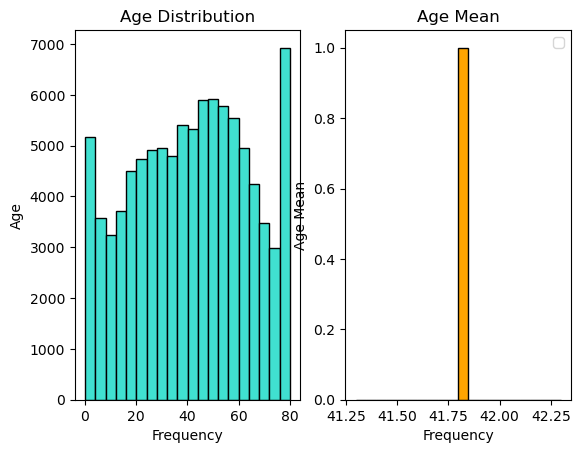

In [19]:
plt.subplot(1, 2, 1)
plt.hist(df['age'], bins = 20, color = 'turquoise', edgecolor = 'black')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
plt.title('Age Mean')
plt.hist(df['age'].mean(), bins = 20, color = 'orange', edgecolor = 'black')
plt.xlabel('Frequency')
plt.ylabel('Age Mean')
plt.legend()
plt.show()

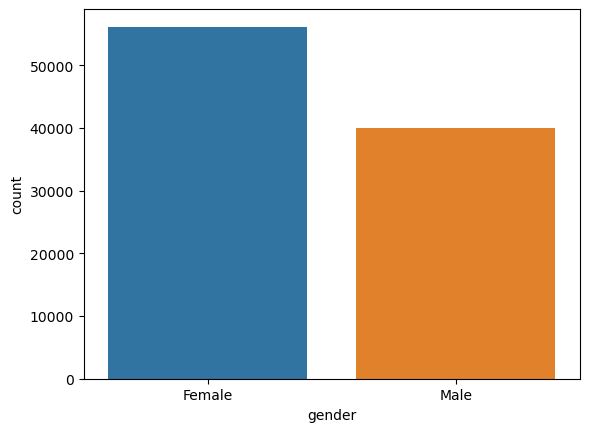

In [20]:
sns.countplot(x = 'gender', data = df)
plt.show()

H:\Fortnite\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
H:\Fortnite\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


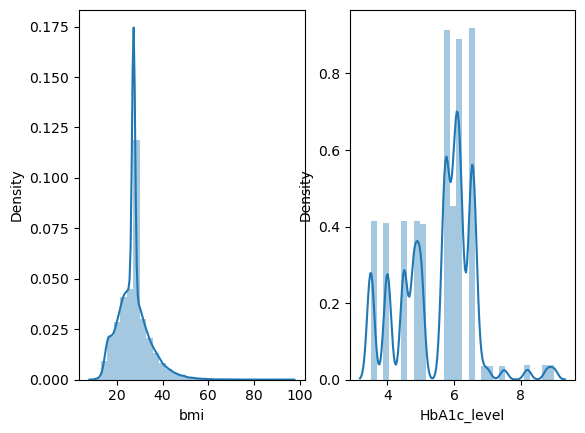

In [21]:
plt.subplot(1, 2, 1)
sns.distplot(df['bmi'], bins = 30)
plt.subplot(1, 2, 2)
sns.distplot(df['HbA1c_level'], bins = 30)
plt.show()

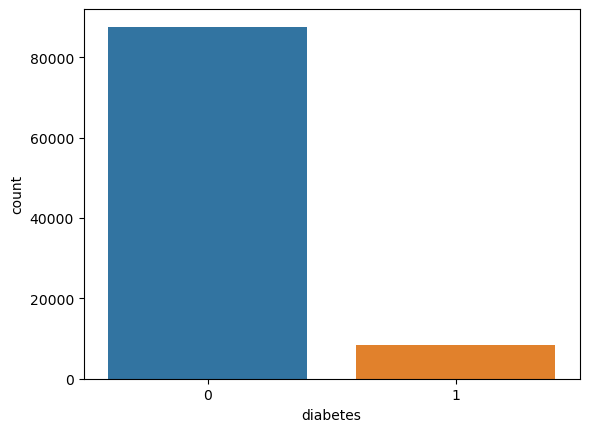

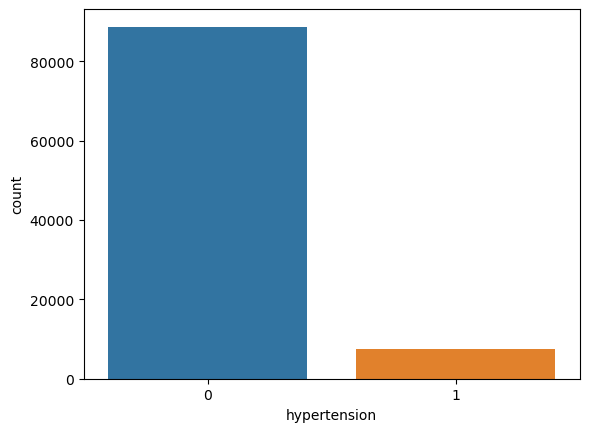

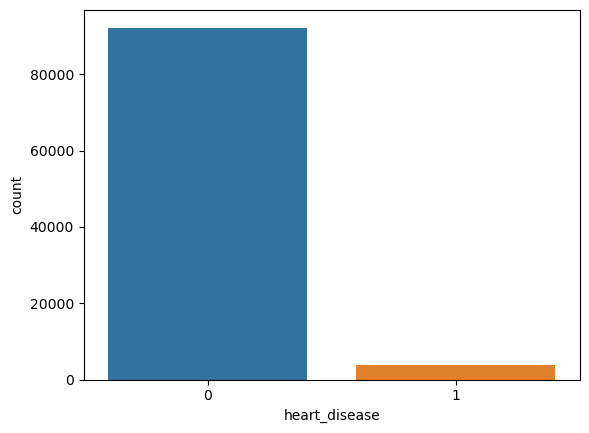

In [22]:
#binary features:
for col in ['diabetes', 'hypertension', 'heart_disease']:
    sns.countplot(x = col, data = df)
    plt.show()

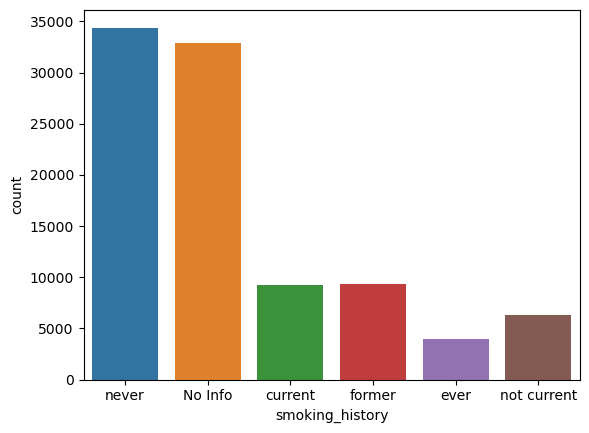

In [23]:
sns.countplot(x = 'smoking_history', data = df)
plt.show()

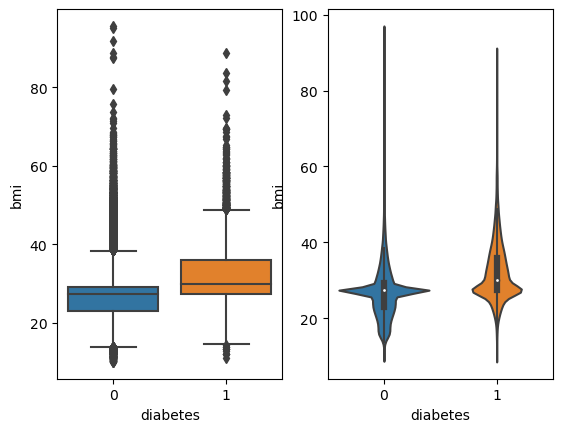

In [24]:
plt.subplot(1, 2, 1)
sns.boxplot(x = df['diabetes'], y = df['bmi'])
plt.subplot(1, 2, 2)
sns.violinplot(x = df['diabetes'], y = df['bmi'])
plt.show()

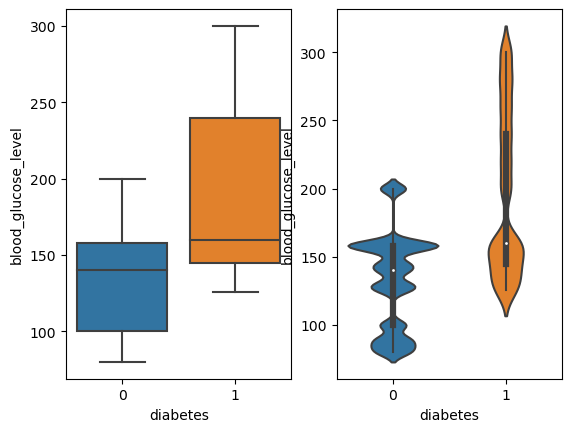

In [25]:
plt.subplot(1, 2, 1)
sns.boxplot(x = df['diabetes'], y = df['blood_glucose_level'])
plt.subplot(1, 2, 2)
sns.violinplot(x = df['diabetes'], y = df['blood_glucose_level'])
plt.show()

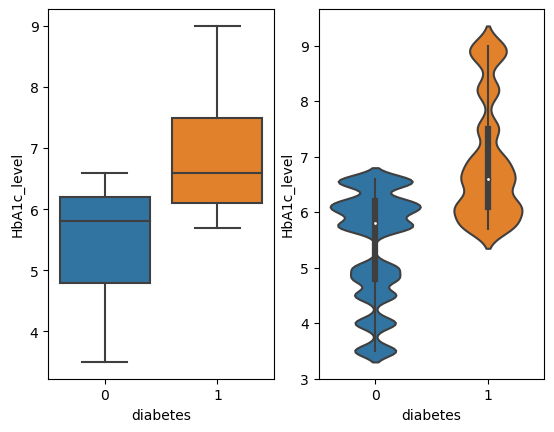

In [26]:
plt.subplot(1, 2, 1)
sns.boxplot(x = df['diabetes'], y = df['HbA1c_level'])
plt.subplot(1, 2, 2)
sns.violinplot(x = df['diabetes'], y = df['HbA1c_level'])
plt.show()

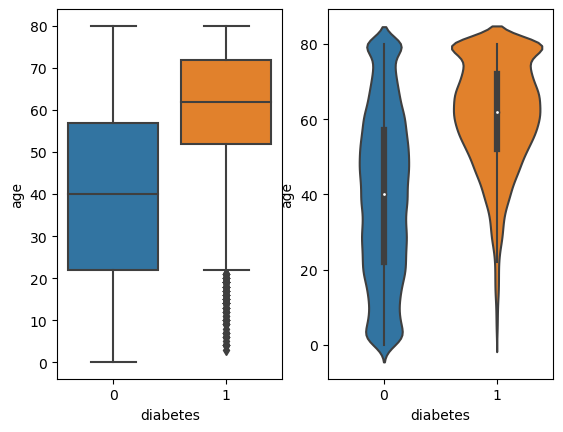

In [27]:
plt.subplot(1, 2, 1)
sns.boxplot(x = df['diabetes'], y = df['age'])
plt.subplot(1, 2, 2)
sns.violinplot(x = df['diabetes'], y = df['age'])
plt.show()

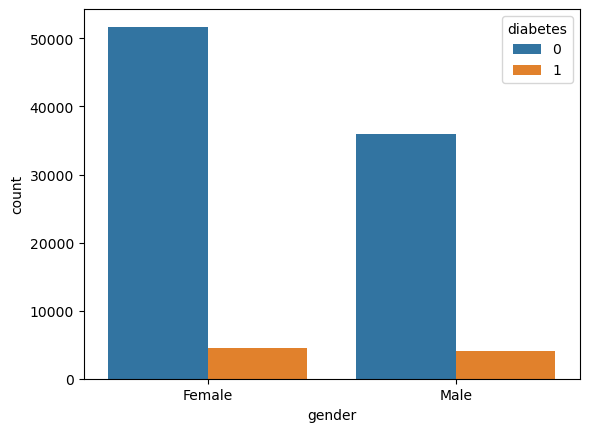

In [28]:
sns.countplot(x = 'gender', hue = 'diabetes', data = df)
plt.show()

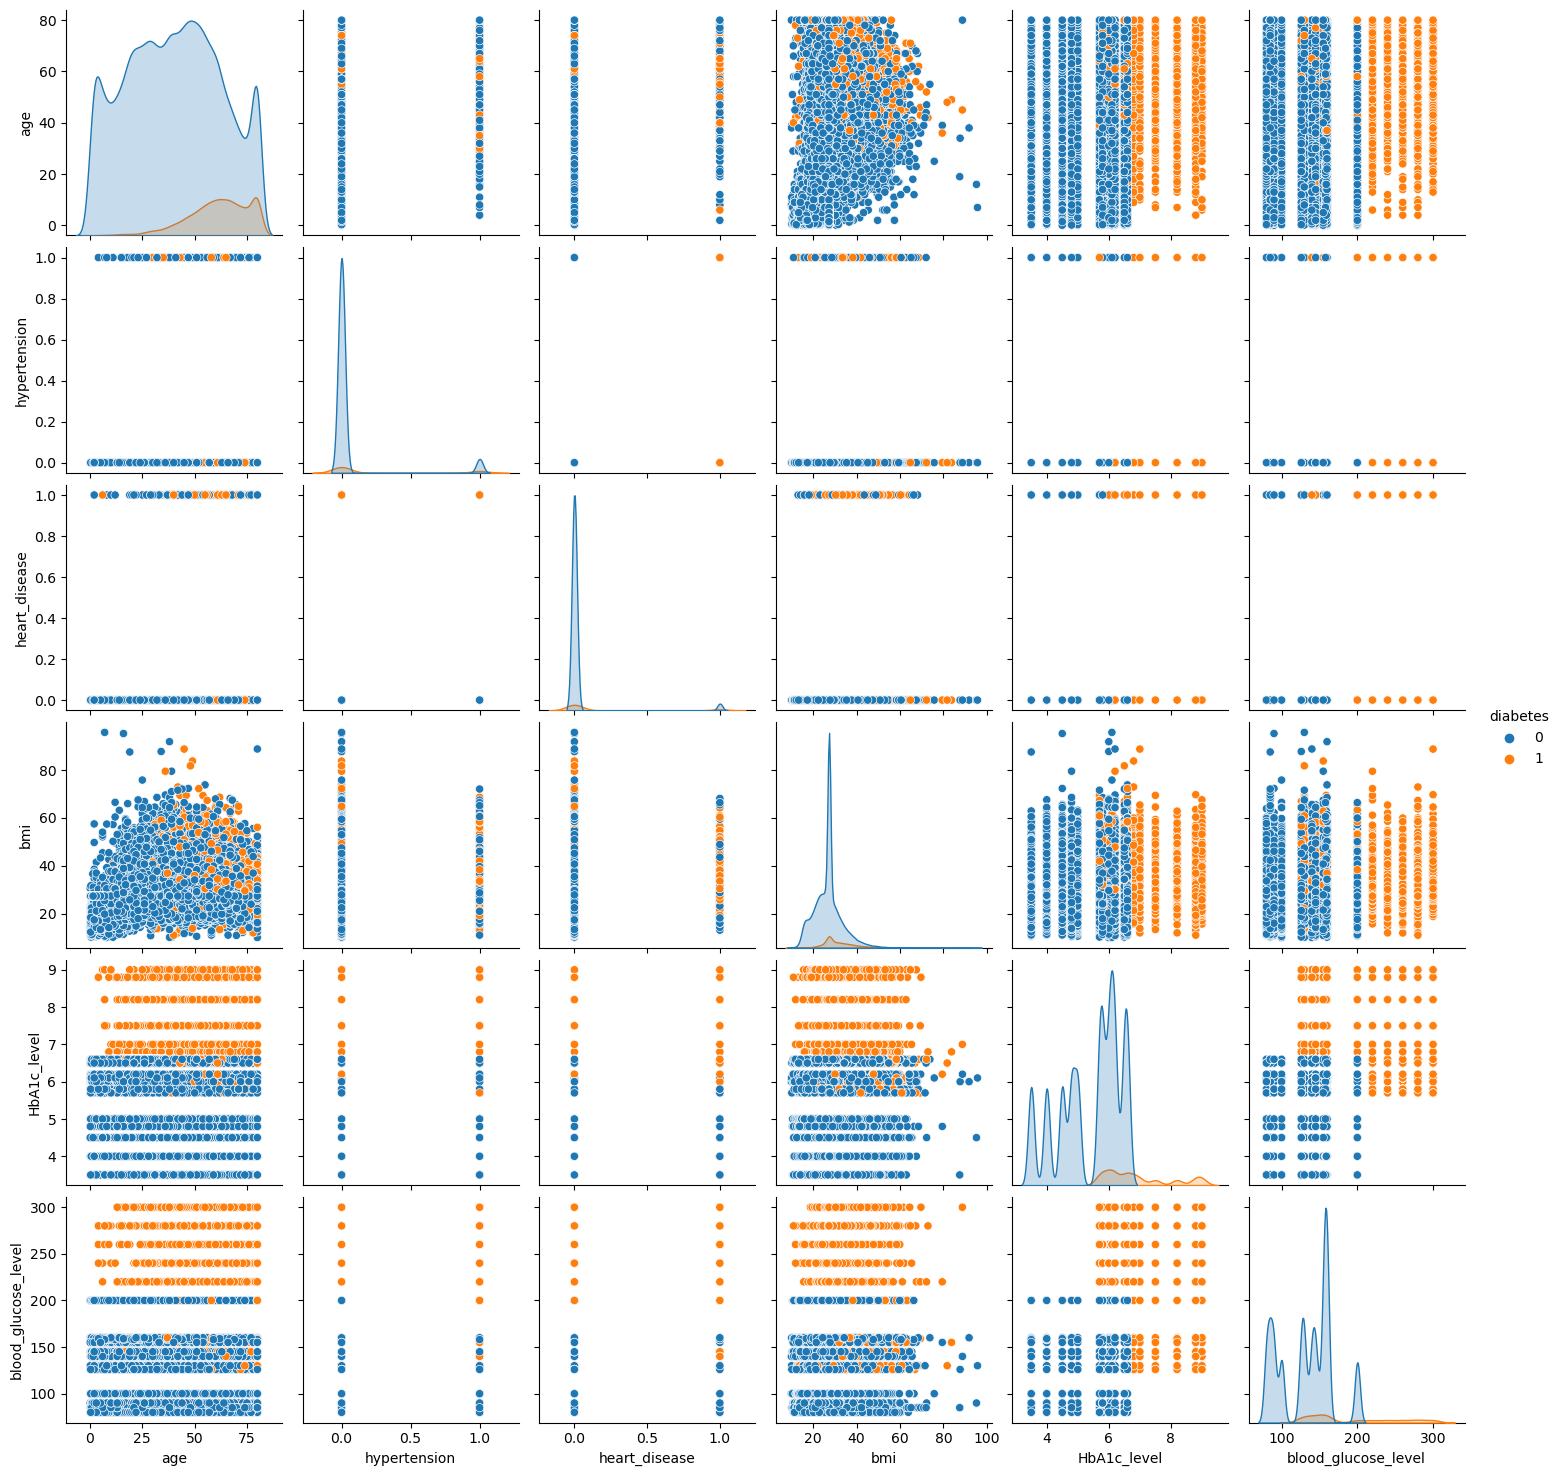

In [29]:
sns.pairplot(df, hue = 'diabetes')
plt.show()

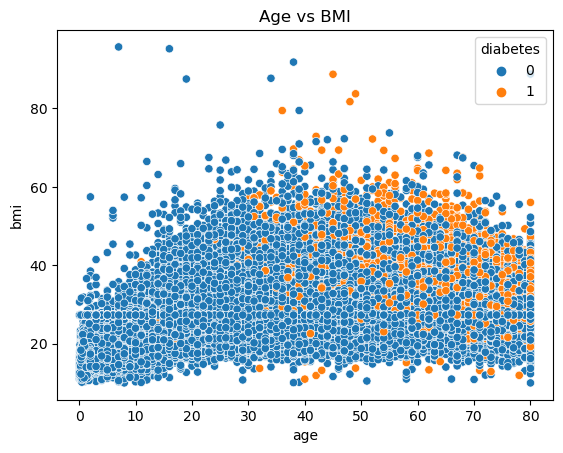

In [30]:
# Scatterplot Age vs BMI colored by Diabetes classification
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df)
plt.title('Age vs BMI')
plt.show()


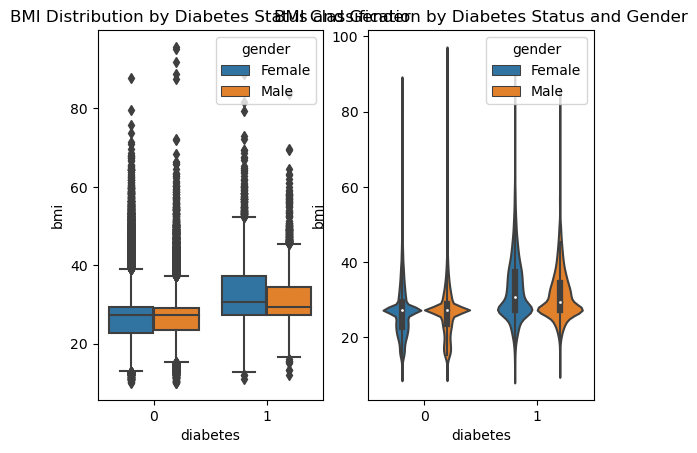

In [31]:
# Interaction between gender, BMI and diabetes
plt.subplot(1, 2, 1)
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=df)
plt.title('BMI Distribution by Diabetes Status and Gender')

plt.subplot(1, 2, 2)
sns.violinplot(x='diabetes', y='bmi', hue='gender', data=df)
plt.title('BMI Classification by Diabetes Status and Gender')
plt.show()

# Correlation 

In [32]:
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'Non Smoker'
    elif smoking_status in ['current', 'former']:
        return 'Smoker!'
    elif smoking_status in ['ever', 'not current']:
        return 'Past Smoker'

In [33]:
df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)

In [34]:
# Check the new value counts
print(df['smoking_history'].value_counts())

Non Smoker     67276
Smoker!        18496
Past Smoker    10356
Name: smoking_history, dtype: int64


In [35]:
dt = df.copy()

In [36]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96128 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96128 non-null  object 
 1   age                  96128 non-null  float64
 2   hypertension         96128 non-null  int64  
 3   heart_disease        96128 non-null  int64  
 4   smoking_history      96128 non-null  object 
 5   bmi                  96128 non-null  float64
 6   HbA1c_level          96128 non-null  float64
 7   blood_glucose_level  96128 non-null  int64  
 8   diabetes             96128 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 9.3+ MB


In [37]:
dt.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,Non Smoker,25.19,6.6,140,0
1,Female,54.0,0,0,Non Smoker,27.32,6.6,80,0
2,Male,28.0,0,0,Non Smoker,27.32,5.7,158,0
3,Female,36.0,0,0,Smoker!,23.45,5.0,155,0
4,Male,76.0,1,1,Smoker!,20.14,4.8,155,0


In [38]:
dt.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99994,Female,36.0,0,0,Non Smoker,24.60,4.8,145,0
99996,Female,2.0,0,0,Non Smoker,17.37,6.5,100,0
99997,Male,66.0,0,0,Smoker!,27.83,5.7,155,0
99998,Female,24.0,0,0,Non Smoker,35.42,4.0,100,0
99999,Female,57.0,0,0,Smoker!,22.43,6.6,90,0


In [39]:
dt.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000
mean,41.796617,0.077615,0.040810,27.321450,5.532633,138.218001,0.088237
std,22.463329,0.267567,0.197851,6.767811,1.073225,40.911190,0.283640
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [40]:
dt.describe(include ='object')

,gender,smoking_history
count,96128,96128
unique,2,3
top,Female,Non Smoker
freq,56161,67276


<AxesSubplot:>

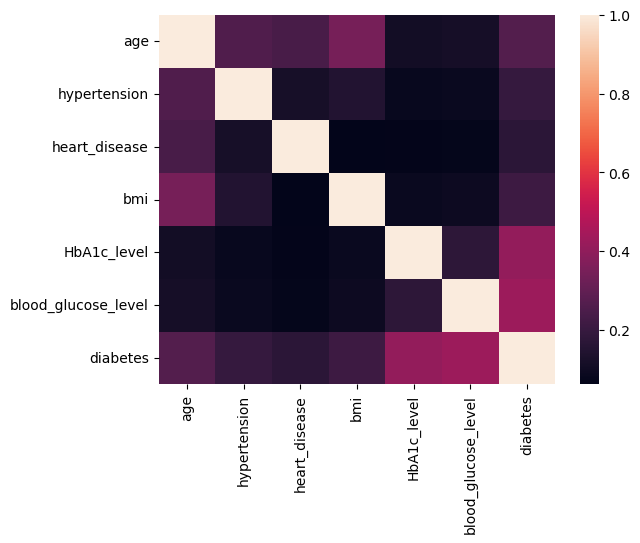

In [41]:
sns.heatmap(dt.corr())

In [42]:
def encoder (df, col_name):
    #Perform One Hot Encoding:
    dummies = pd.get_dummies(df[col_name], prefix = col_name)
    #Drop the org col and append the new dummy cols:
    df = pd.concat([df.drop(col_name, axis = 1), dummies], axis = 1)
    
    return df

In [43]:
dt = encoder(dt, 'smoking_history')
dt = encoder(dt, 'gender')

In [44]:
dt

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_Non Smoker,smoking_history_Past Smoker,smoking_history_Smoker!,gender_Female,gender_Male
0,80.0,0,1,25.19,6.6,140,0,1,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,1,0
2,28.0,0,0,27.32,5.7,158,0,1,0,0,0,1
3,36.0,0,0,23.45,5.0,155,0,0,0,1,1,0
4,76.0,1,1,20.14,4.8,155,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,36.0,0,0,24.60,4.8,145,0,1,0,0,1,0
99996,2.0,0,0,17.37,6.5,100,0,1,0,0,1,0
99997,66.0,0,0,27.83,5.7,155,0,0,0,1,0,1
99998,24.0,0,0,35.42,4.0,100,0,1,0,0,1,0


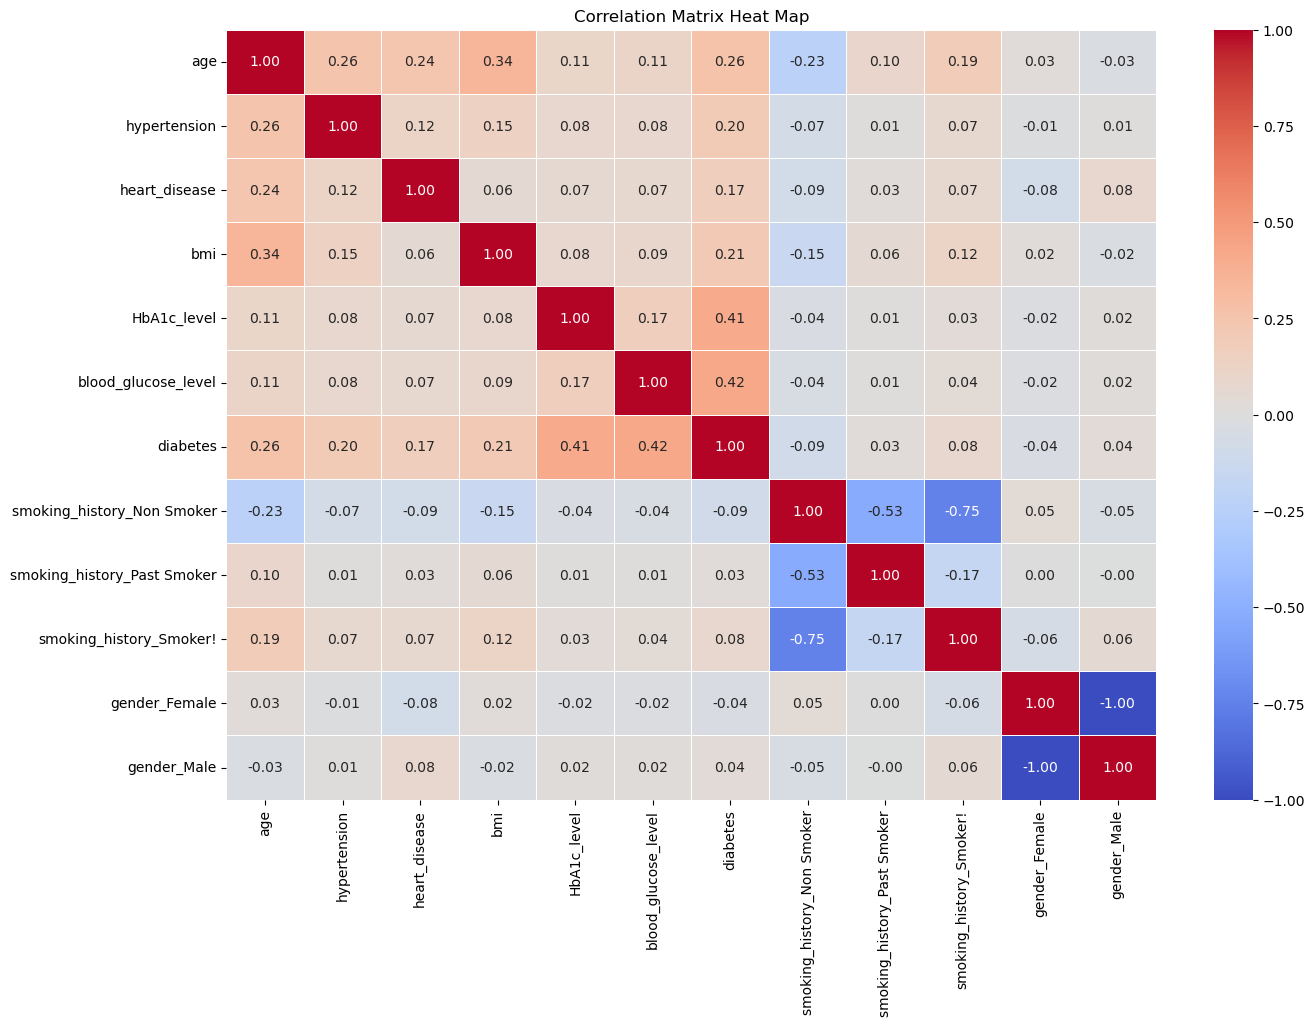

In [45]:
correlation_matrix = dt.corr()
plt.figure(figsize = (15, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5, fmt = '.2f')
plt.title('Correlation Matrix Heat Map')
plt.show()

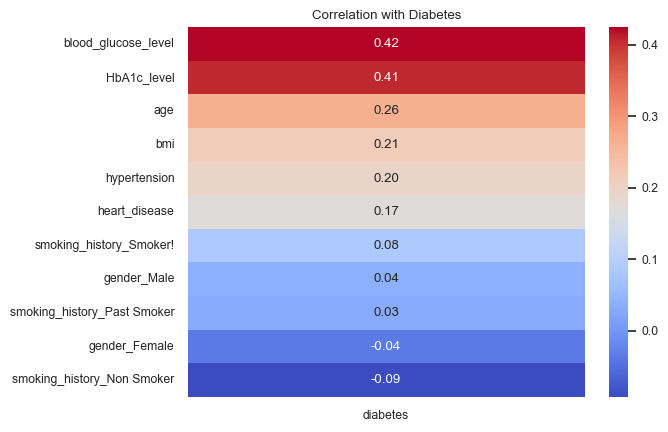

In [46]:
#CReate a heatmap of correlations with the target column:
corr = dt.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

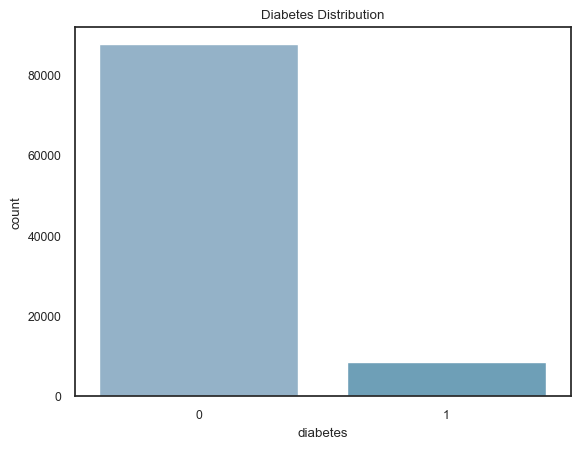

In [47]:
sns.countplot(x = 'diabetes', data = df)
plt.title('Diabetes Distribution')
plt.show()

In [48]:
#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

#Define Resampling:
over = SMOTE(sampling_strategy = 0.1)

In [49]:
#Import Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [50]:
under = RandomUnderSampler(sampling_strategy = 0.5)

In [51]:
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension','heart_disease']),
        ('cat', OneHotEncoder(), ['gender','smoking_history'])
    ])

# Split data into features and target variable
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [52]:
## Create a pipeline that preprocesses the data, resamples data, and then trains a classifier
clf = imbPipeline(steps=[('preprocessor', preprocessor),
                      ('over', over),
                      ('under', under),
                      ('classifier', RandomForestClassifier())])

In [53]:
# Define the hyperparameters and the values we want to test
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [55]:
# Create Grid Search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Split data into train and test sets
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}


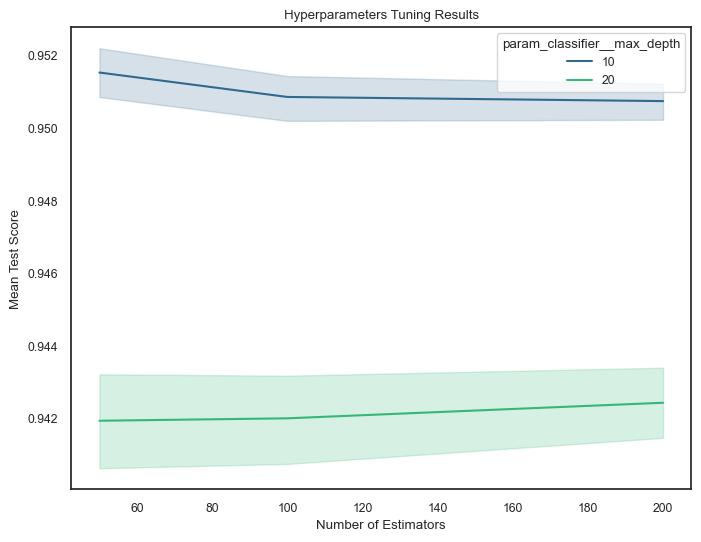

In [56]:
# Convert GridSearchCV results to a DataFrame and plot
results_df = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(8, 6))
sns.lineplot(data=results_df, x='param_classifier__n_estimators', y='mean_test_score', hue='param_classifier__max_depth', palette='viridis')
plt.title('Hyperparameters Tuning Results')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.show()

In [57]:
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__max_depth,param_classifier__min_samples_leaf,param_classifier__min_samples_split,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.765499,0.016024,0.115614,0.007658,None,1,2,50,"{'classifier__max_depth': None, 'classifier__m...",0.936870,0.934855,0.940247,0.940702,0.935501,0.937635,0.002413,79
1,1.337786,0.082310,0.237917,0.026533,None,1,2,100,"{'classifier__max_depth': None, 'classifier__m...",0.933294,0.931929,0.937776,0.940702,0.936216,0.935984,0.003137,81
2,2.323234,0.115932,0.409343,0.006241,None,1,2,200,"{'classifier__max_depth': None, 'classifier__m...",0.936155,0.934009,0.936216,0.939402,0.937841,0.936725,0.001809,80
3,0.734330,0.009882,0.112486,0.006252,None,1,5,50,"{'classifier__max_depth': None, 'classifier__m...",0.937130,0.933489,0.940637,0.941352,0.939402,0.938402,0.002844,76
4,1.215551,0.006244,0.212480,0.007650,None,1,5,100,"{'classifier__max_depth': None, 'classifier__m...",0.939471,0.935375,0.942718,0.941938,0.937516,0.939403,0.002728,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1.153048,0.006250,0.206234,0.006250,20,4,5,100,"{'classifier__max_depth': 20, 'classifier__min...",0.941486,0.942657,0.945839,0.945514,0.941743,0.943448,0.001864,44
77,2.424838,0.467507,0.453089,0.052288,20,4,5,200,"{'classifier__max_depth': 20, 'classifier__min...",0.943762,0.943372,0.944083,0.946424,0.943563,0.944241,0.001117,38
78,0.743704,0.081248,0.106239,0.006250,20,4,10,50,"{'classifier__max_depth': 20, 'classifier__min...",0.944997,0.941746,0.945254,0.947529,0.942068,0.944319,0.002160,36
79,1.149922,0.021194,0.196858,0.012501,20,4,10,100,"{'classifier__max_depth': 20, 'classifier__min...",0.943567,0.944412,0.942198,0.946879,0.943888,0.944189,0.001532,39


Model Accuracy:  0.9476230105066057
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     17525
           1       0.67      0.80      0.73      1701

    accuracy                           0.95     19226
   macro avg       0.83      0.88      0.85     19226
weighted avg       0.95      0.95      0.95     19226



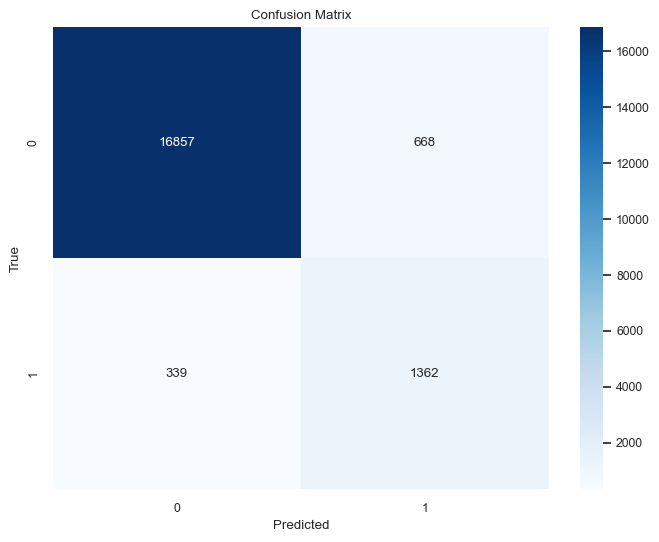

In [59]:
# Predict on the test set using the best model
y_pred = grid_search.predict(x_test)

# Evaluate the model
print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

                        Feature  Importance
2                   HbA1c_level    0.413686
3           blood_glucose_level    0.331566
0                           age    0.125760
1                           BMI    0.070591
4                  hypertension    0.030805
5                 heart_disease    0.017480
8    smoking_history_Non Smoker    0.003493
7                   gender_Male    0.002141
10      smoking_history_Smoker!    0.002025
6                 gender_Female    0.001722
9   smoking_history_Past Smoker    0.000730


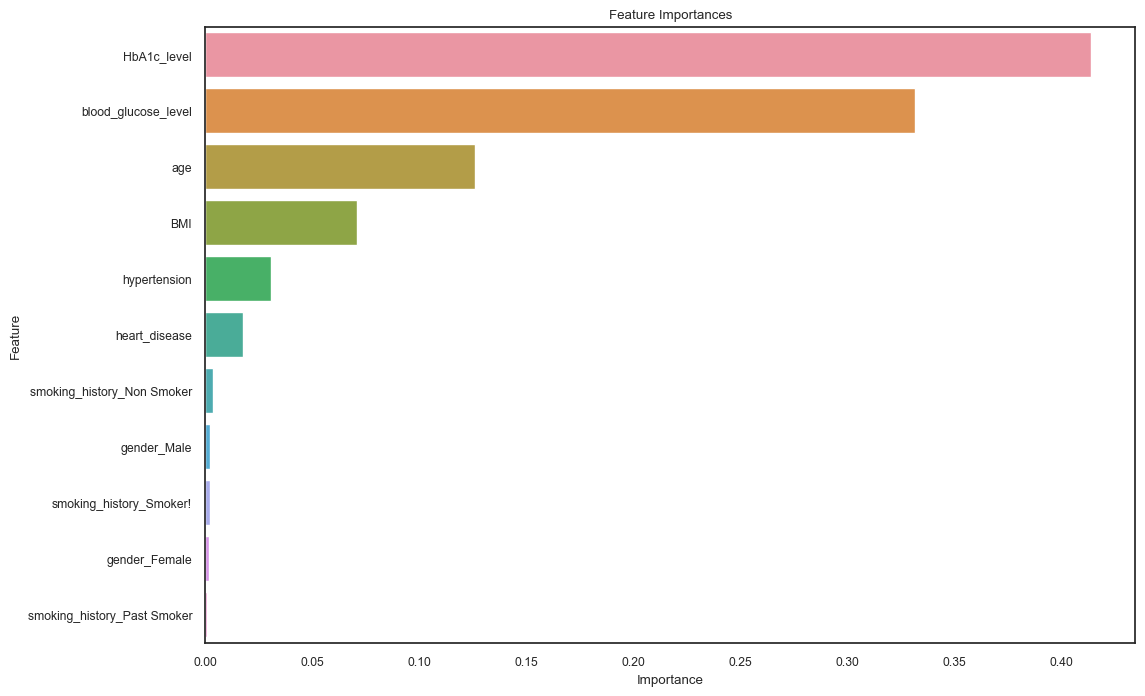

In [60]:
# After fitting the model, we input feature names
onehot_columns = list(grid_search.best_estimator_.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['gender', 'smoking_history']))

# Then we add the numeric feature names
feature_names = ['age', 'BMI', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease'] + onehot_columns

# And now let's get the feature importances
importances = grid_search.best_estimator_.named_steps['classifier'].feature_importances_

# Create a dataframe for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the dataframe by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()